Model: `albert-xlarge-v2`

Dataset: squadv2

HPs: wu=100, lr=3e5, bs=32, msl=384

Performance by checkpoint for the following categories:
1. WWWWWWH
2. Answerable vs Unanswerable
3. Answer length
4. Context length
5. Question length

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')

In [3]:
BATCH_SIZE = 32

## WWWWWWH

In [4]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [5]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(2880, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,w6h_label,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.088692,3.120238,2255,0.080128,5.557802,1248,0.099305,0.099305,1007,44.656319,0.0,44.656319,0.0,other,1,2.88437,0.075802,27,32
1,0.000000,1.463595,736,0.000000,2.812547,383,0.000000,0.000000,353,47.961957,0.0,47.977053,0.0,when,1,2.88437,0.075802,27,32
2,0.000000,2.297142,984,0.000000,4.924592,459,0.000000,0.000000,525,53.353659,0.0,53.353659,0.0,who,1,2.88437,0.075802,27,32
3,0.068811,3.015295,5813,0.109649,6.369850,2736,0.032499,0.032499,3077,52.933081,0.0,52.933081,0.0,what,1,2.88437,0.075802,27,32
4,0.000000,2.544910,429,0.000000,4.873957,224,0.000000,0.000000,205,47.785548,0.0,47.785548,0.0,where,1,2.88437,0.075802,27,32


### Full checkpoints

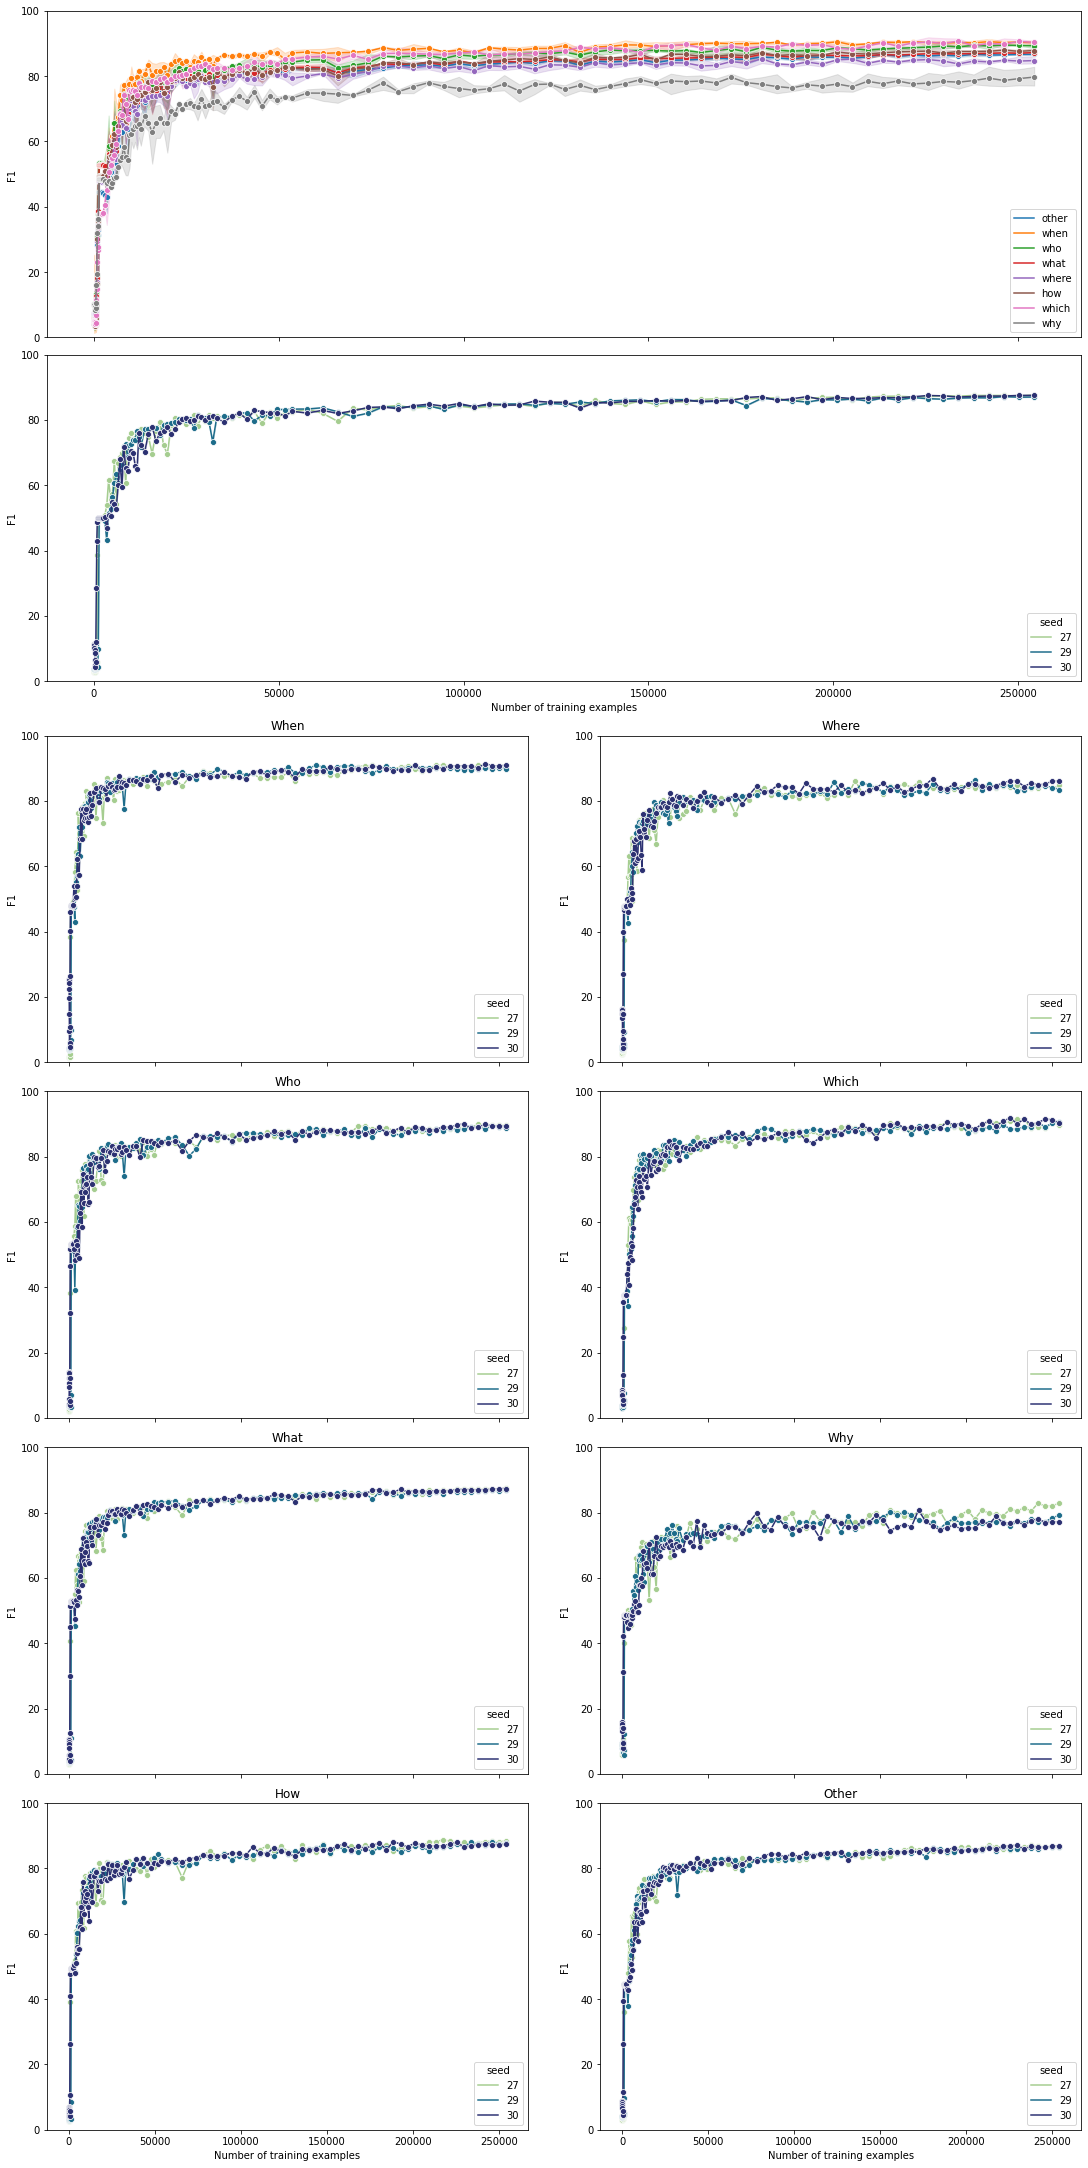

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(15, 30))
gs = fig.add_gridspec(6, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='w6h_label', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[5, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('How')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'how'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'When' by seed
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('When')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'when'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# 'Who' by seed
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('Who')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'who'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# 'What' by seed
ax7 = fig.add_subplot(gs[4, 0], sharex=ax9, sharey=ax9)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.set_ylabel('F1')
ax7.set_title('What')
ax7.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'what'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax7)
ax7.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[5, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Other')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'other'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# 'Where' by seed
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('Where')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'where'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# 'Which' by seed
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('Which')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'which'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

# 'Why' by seed
ax8 = fig.add_subplot(gs[4, 1], sharex=ax10, sharey=ax10)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.set_ylabel('F1')
ax8.set_title('Why')
ax8.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'why'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax8)
ax8.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [7]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 1500]

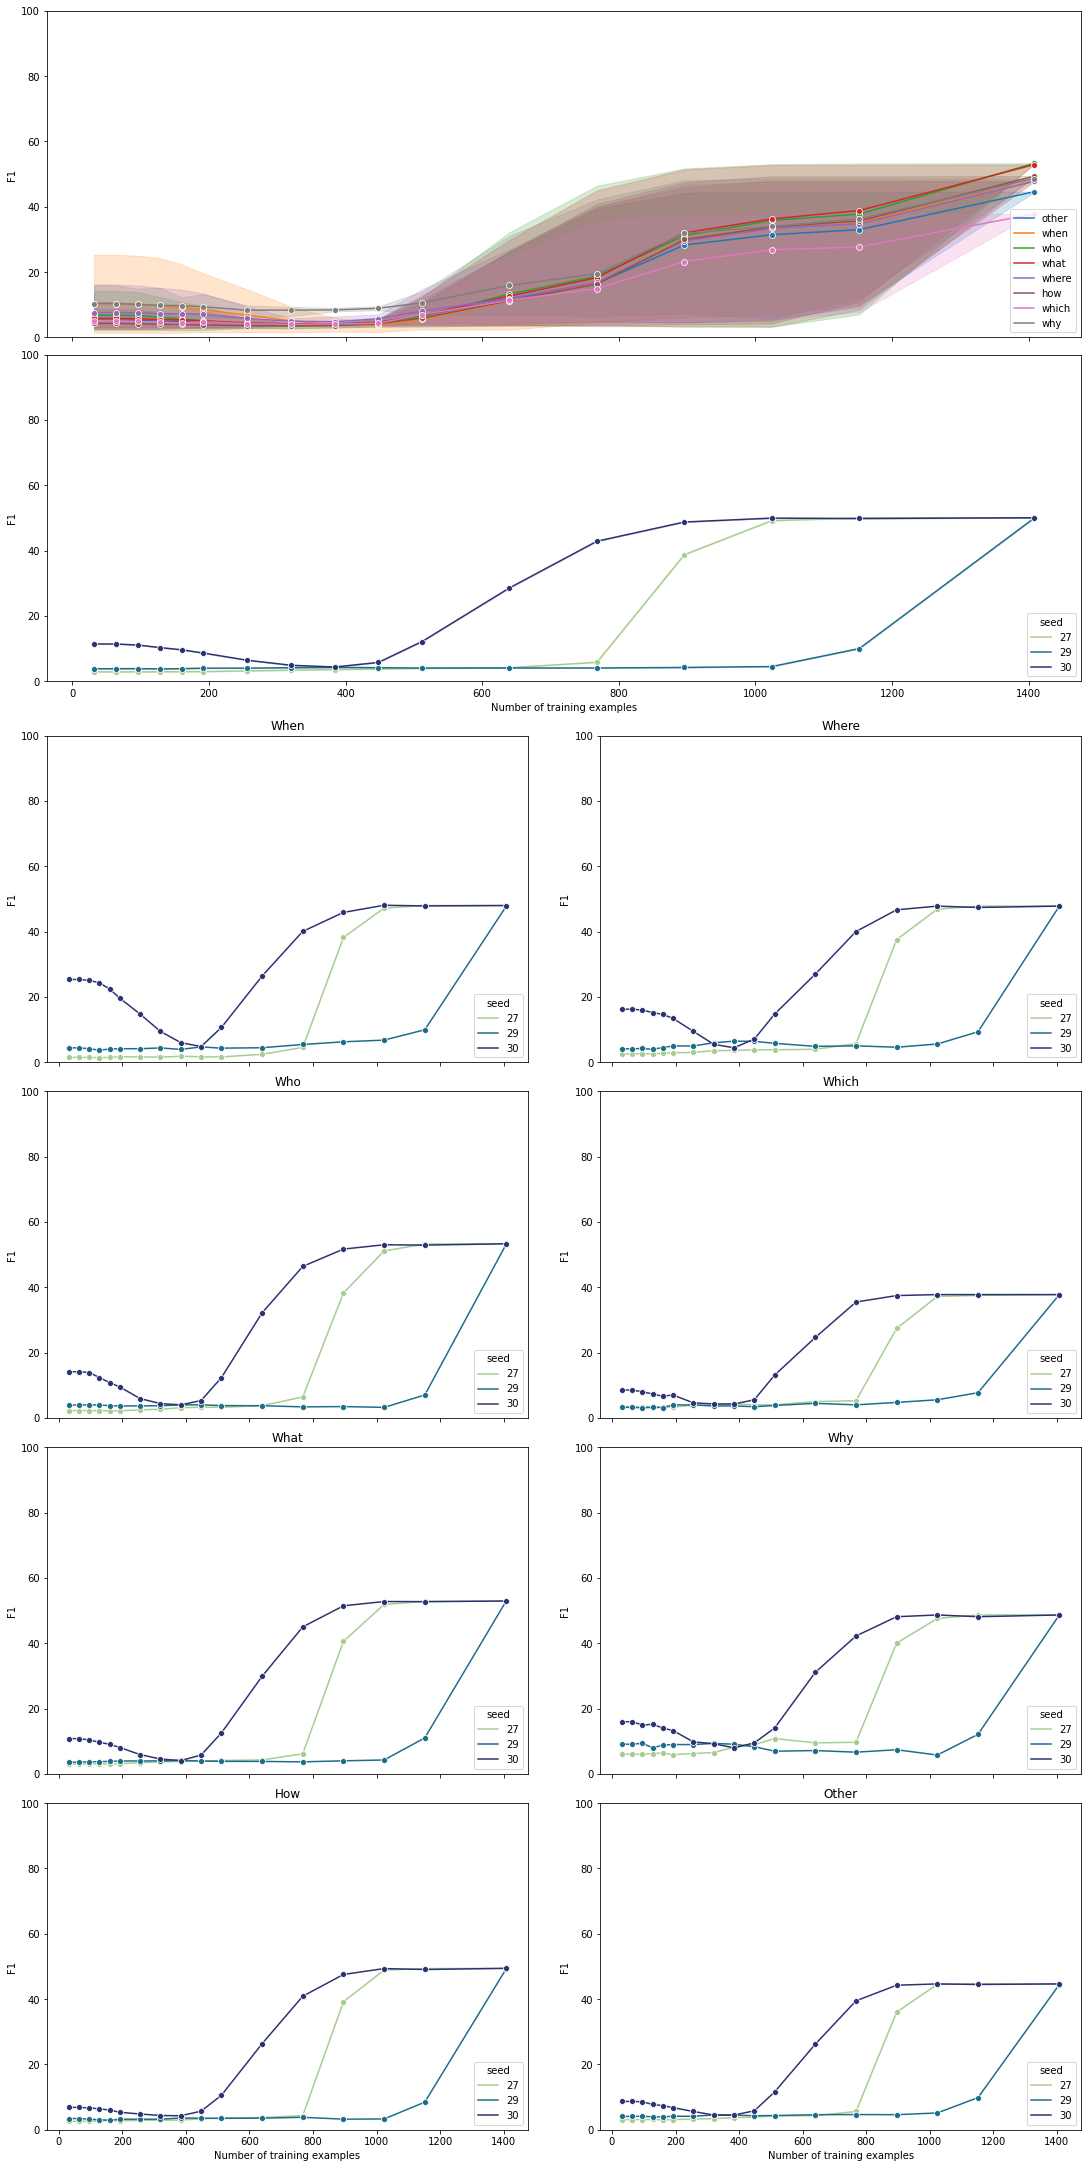

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(15, 30))
gs = fig.add_gridspec(6, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='w6h_label', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[5, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('How')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'how'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'When' by seed
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('When')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'when'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# 'Who' by seed
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('Who')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'who'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# 'What' by seed
ax7 = fig.add_subplot(gs[4, 0], sharex=ax9, sharey=ax9)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.set_ylabel('F1')
ax7.set_title('What')
ax7.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'what'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax7)
ax7.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[5, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Other')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'other'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# 'Where' by seed
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('Where')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'where'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# 'Which' by seed
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('Which')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'which'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

# 'Why' by seed
ax8 = fig.add_subplot(gs[4, 1], sharex=ax10, sharey=ax10)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.set_ylabel('F1')
ax8.set_title('Why')
ax8.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'why'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax8)
ax8.legend(title='seed', loc='lower right')

plt.show()

## Answerable vs. unanswerable

In [9]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_unanswerable-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_unanswerable-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_unanswerable-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [10]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(720, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,unanswerable,checkpoint,NoAns_exact,NoAns_f1,NoAns_total,overall_f1,overall_exact,seed,num_examples
0,0.067476,5.692667,5928,0.067476,5.692667,5928.0,0.067476,0.0,5.692667,0.0,0,1,NaN,NaN,NaN,2.88437,0.075802,27,32
1,0.084104,0.084104,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,1,1,0.084104,0.084104,5945.0,2.88437,0.075802,27,32
2,0.067476,5.692667,5928,0.067476,5.692667,5928.0,0.067476,0.0,5.692667,0.0,0,2,NaN,NaN,NaN,2.88437,0.075802,27,64
3,0.084104,0.084104,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,1,2,0.084104,0.084104,5945.0,2.88437,0.075802,27,64
4,0.067476,5.692667,5928,0.067476,5.692667,5928.0,0.067476,0.0,5.692667,0.0,0,3,NaN,NaN,NaN,2.88437,0.075802,27,96


### Full checkpoints

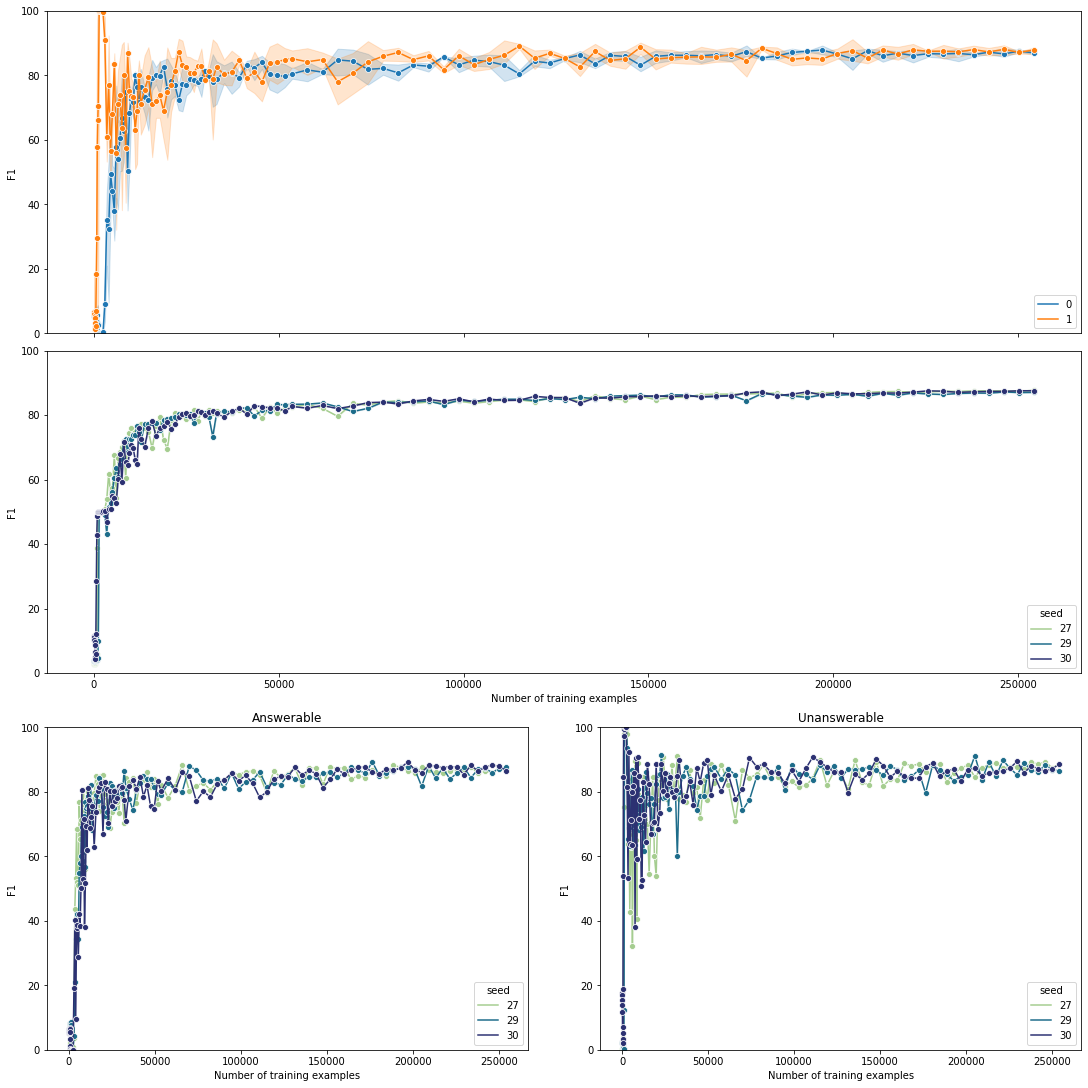

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
gs = fig.add_gridspec(3, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='unanswerable', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[2, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('Answerable')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['unanswerable'] == 0], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[2, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Unanswerable')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['unanswerable'] == 1], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [12]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

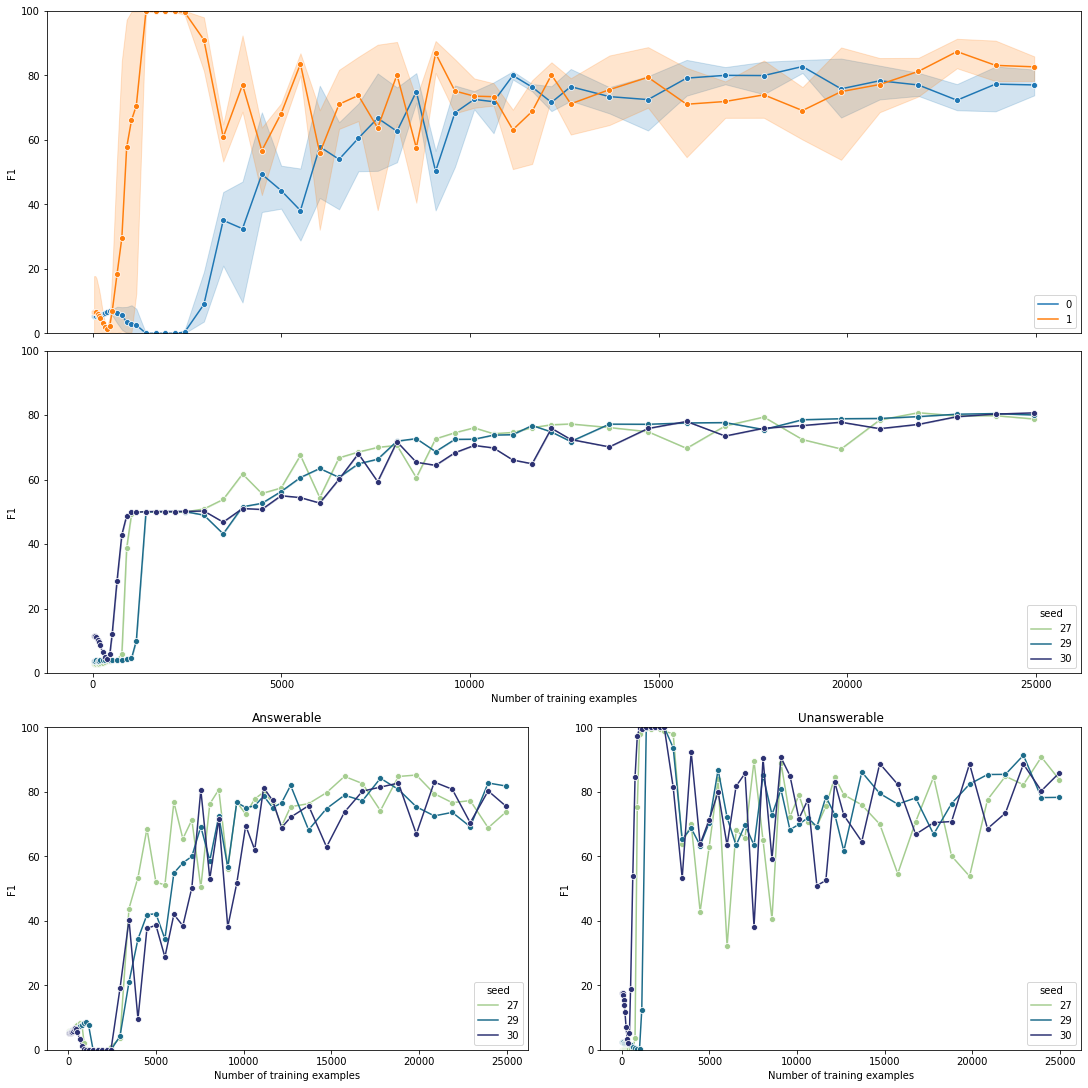

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
gs = fig.add_gridspec(3, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='unanswerable', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[2, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('Answerable')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['unanswerable'] == 0], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[2, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Unanswerable')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['unanswerable'] == 1], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

plt.show()

## Answer length

In [14]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_answer_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_answer_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_answer_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [15]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(3960, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,answer_length_bin,checkpoint,NoAns_exact,NoAns_f1,NoAns_total,overall_f1,overall_exact,seed,num_examples
0,0.045893,2.760599,2179,0.045893,2.760599,2179.0,0.045893,0.0,2.760599,0.0,1,1,NaN,NaN,NaN,2.88437,0.075802,27,32
1,0.227273,8.602065,440,0.227273,8.602065,440.0,0.227273,0.0,8.602065,0.0,4,1,NaN,NaN,NaN,2.88437,0.075802,27,32
2,0.084104,0.084104,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,0,1,0.084104,0.084104,5945.0,2.88437,0.075802,27,32
3,0.117233,6.383795,853,0.117233,6.383795,853.0,0.117233,0.0,6.383795,0.0,3,1,NaN,NaN,NaN,2.88437,0.075802,27,32
4,0.068213,4.481583,1466,0.068213,4.481583,1466.0,0.068213,0.0,4.481583,0.0,2,1,NaN,NaN,NaN,2.88437,0.075802,27,32


### Full checkpoints

In [16]:
np.sort(metrics_by_cat['answer_length_bin'].unique())

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '>9'],
      dtype=object)

Plot answerable questions only

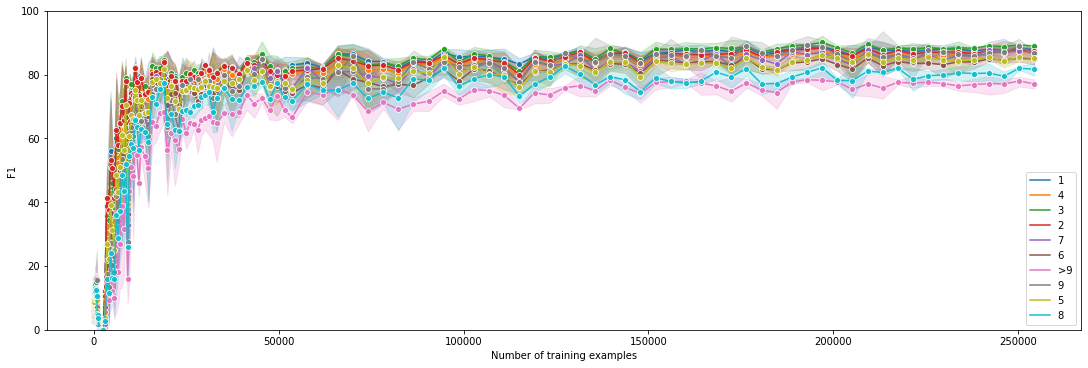

In [17]:
fig = plt.figure(constrained_layout=True, figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

# By category
ax1 = fig.add_subplot(gs[0, :])
ax1.set_ylabel('F1')
ax1.set_xlabel('Number of training examples')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['answer_length_bin'] != '0'], y='f1', x='num_examples', hue='answer_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()

### Initial checkpoints

In [18]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 5000]

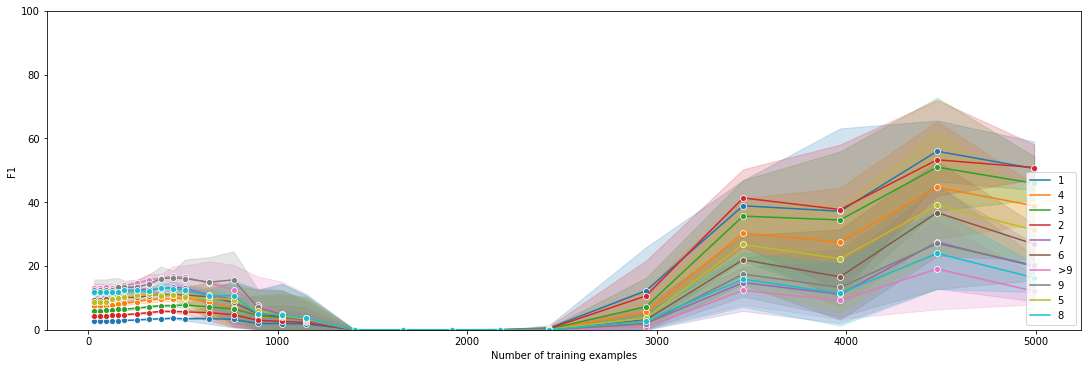

In [19]:
fig = plt.figure(constrained_layout=True, figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

# By category
ax1 = fig.add_subplot(gs[0, :])
ax1.set_ylabel('F1')
ax1.set_xlabel('Number of training examples')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['answer_length_bin'] != '0'], y='f1', x='num_examples', hue='answer_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()

## Context length

In [22]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [23]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(1800, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,context_length_bin,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.042079,2.980496,4753,0.041894,5.892878,2387,0.042265,0.042265,2366,49.779087,0.0,49.781425,0.0,100-150,1,2.88437,0.075802,27,32
1,0.109051,3.043926,917,0.209644,5.851739,477,0.000000,0.000000,440,47.982552,0.0,48.001517,0.0,>200,1,2.88437,0.075802,27,32
2,0.000000,1.354749,150,0.000000,2.540155,80,0.000000,0.000000,70,46.666667,0.0,46.666667,0.0,0-50,1,2.88437,0.075802,27,32
3,0.052383,2.635976,1909,0.000000,5.121577,963,0.105708,0.105708,946,49.554741,0.0,49.554741,0.0,150-200,1,2.88437,0.075802,27,32
4,0.120656,2.908605,4144,0.098961,5.815566,2021,0.141309,0.141309,2123,51.230695,0.0,51.230695,0.0,50-100,1,2.88437,0.075802,27,32


In [24]:
np.sort(metrics_by_cat['context_length_bin'].unique())

array(['0-50', '100-150', '150-200', '50-100', '>200'], dtype=object)

### Full checkpoints

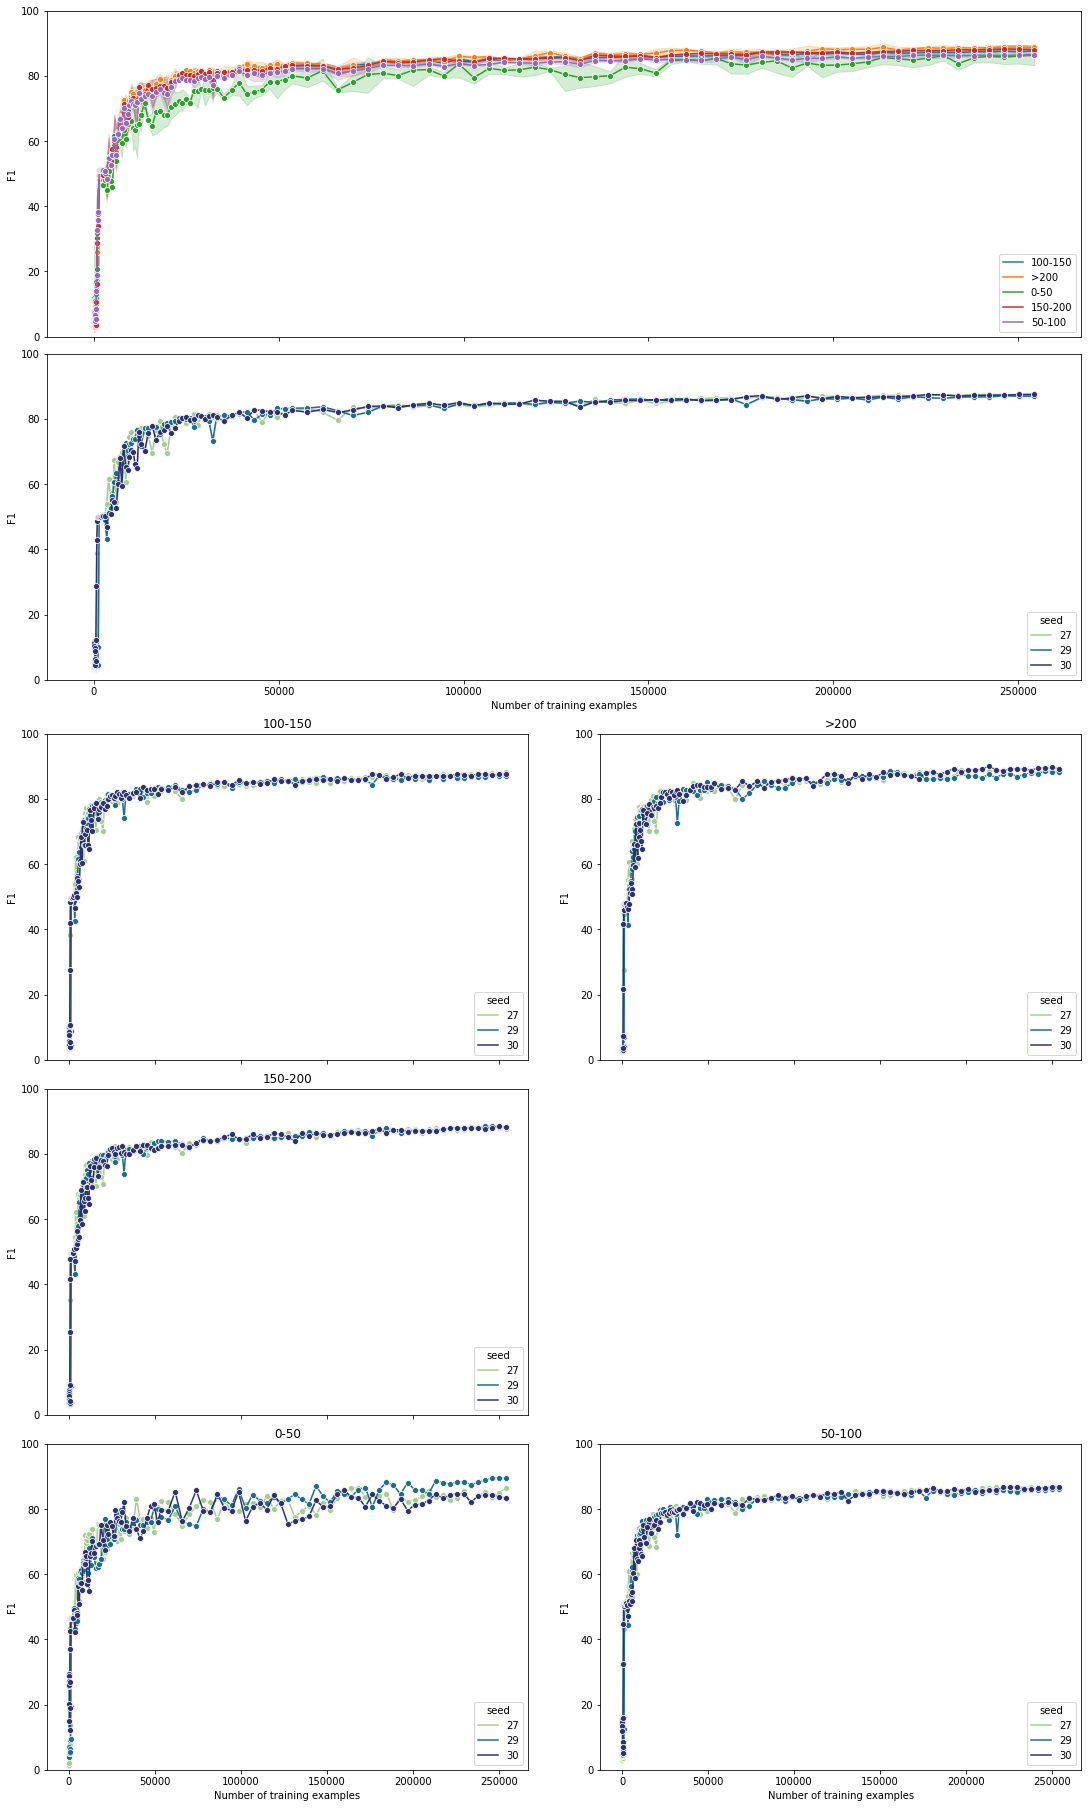

In [25]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='context_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '0-50'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('0-50')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '0-50'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '100-150'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('100-150')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '100-150'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '150-200'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('150-200')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '150-200'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '50-100'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('50-100')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '50-100'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '>200'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('>200')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '>200'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [26]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

In [27]:
metrics_by_cat_subset['context_length_bin'].unique()

array(['100-150', '>200', '0-50', '150-200', '50-100'], dtype=object)

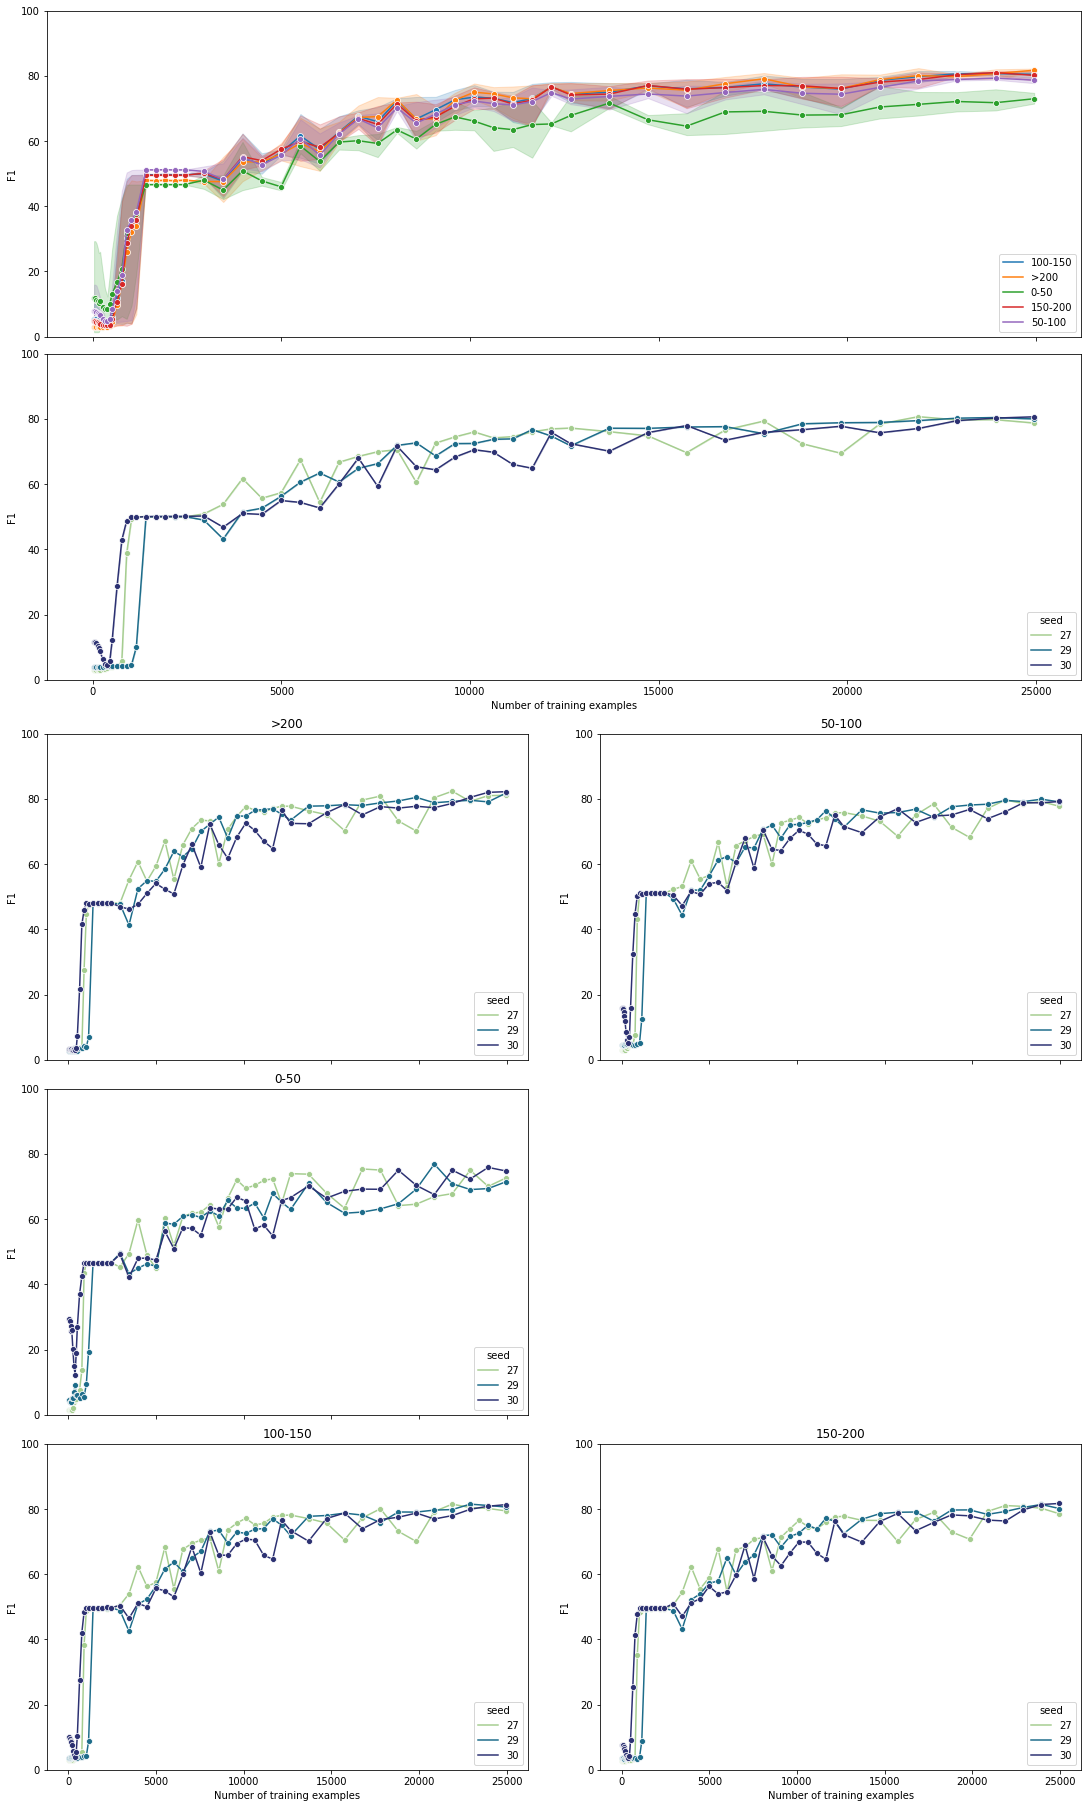

In [28]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='context_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '100-150'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('100-150')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '100-150'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '>200'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('>200')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '>200'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '0-50'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('0-50')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '0-50'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '150-200'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('150-200')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '150-200'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '50-100'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('50-100')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '50-100'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

plt.show()

## Question length

In [29]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [30]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(1440, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,question_length_bin,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.075064,2.735966,6661,0.064020,5.737602,3124,0.084818,0.084818,3537,53.100135,0.0,53.101803,0.0,5-10,1,2.88437,0.075802,27,32
1,0.000000,3.232719,707,0.000000,6.802180,336,0.000000,0.000000,371,52.475248,0.0,52.475248,0.0,0-5,1,2.88437,0.075802,27,32
2,0.109230,2.948162,3662,0.103788,5.498790,1927,0.115274,0.115274,1735,47.378482,0.0,47.378482,0.0,10-15,1,2.88437,0.075802,27,32
3,0.000000,3.487736,843,0.000000,5.434679,541,0.000000,0.000000,302,35.824437,0.0,35.848161,0.0,>15,1,2.88437,0.075802,27,32
4,0.075064,2.735966,6661,0.064020,5.737602,3124,0.084818,0.084818,3537,53.100135,0.0,53.101803,0.0,5-10,2,2.88437,0.075802,27,64


In [31]:
metrics_by_cat['question_length_bin'].unique()

array(['5-10', '0-5', '10-15', '>15'], dtype=object)

### Full checkpoints

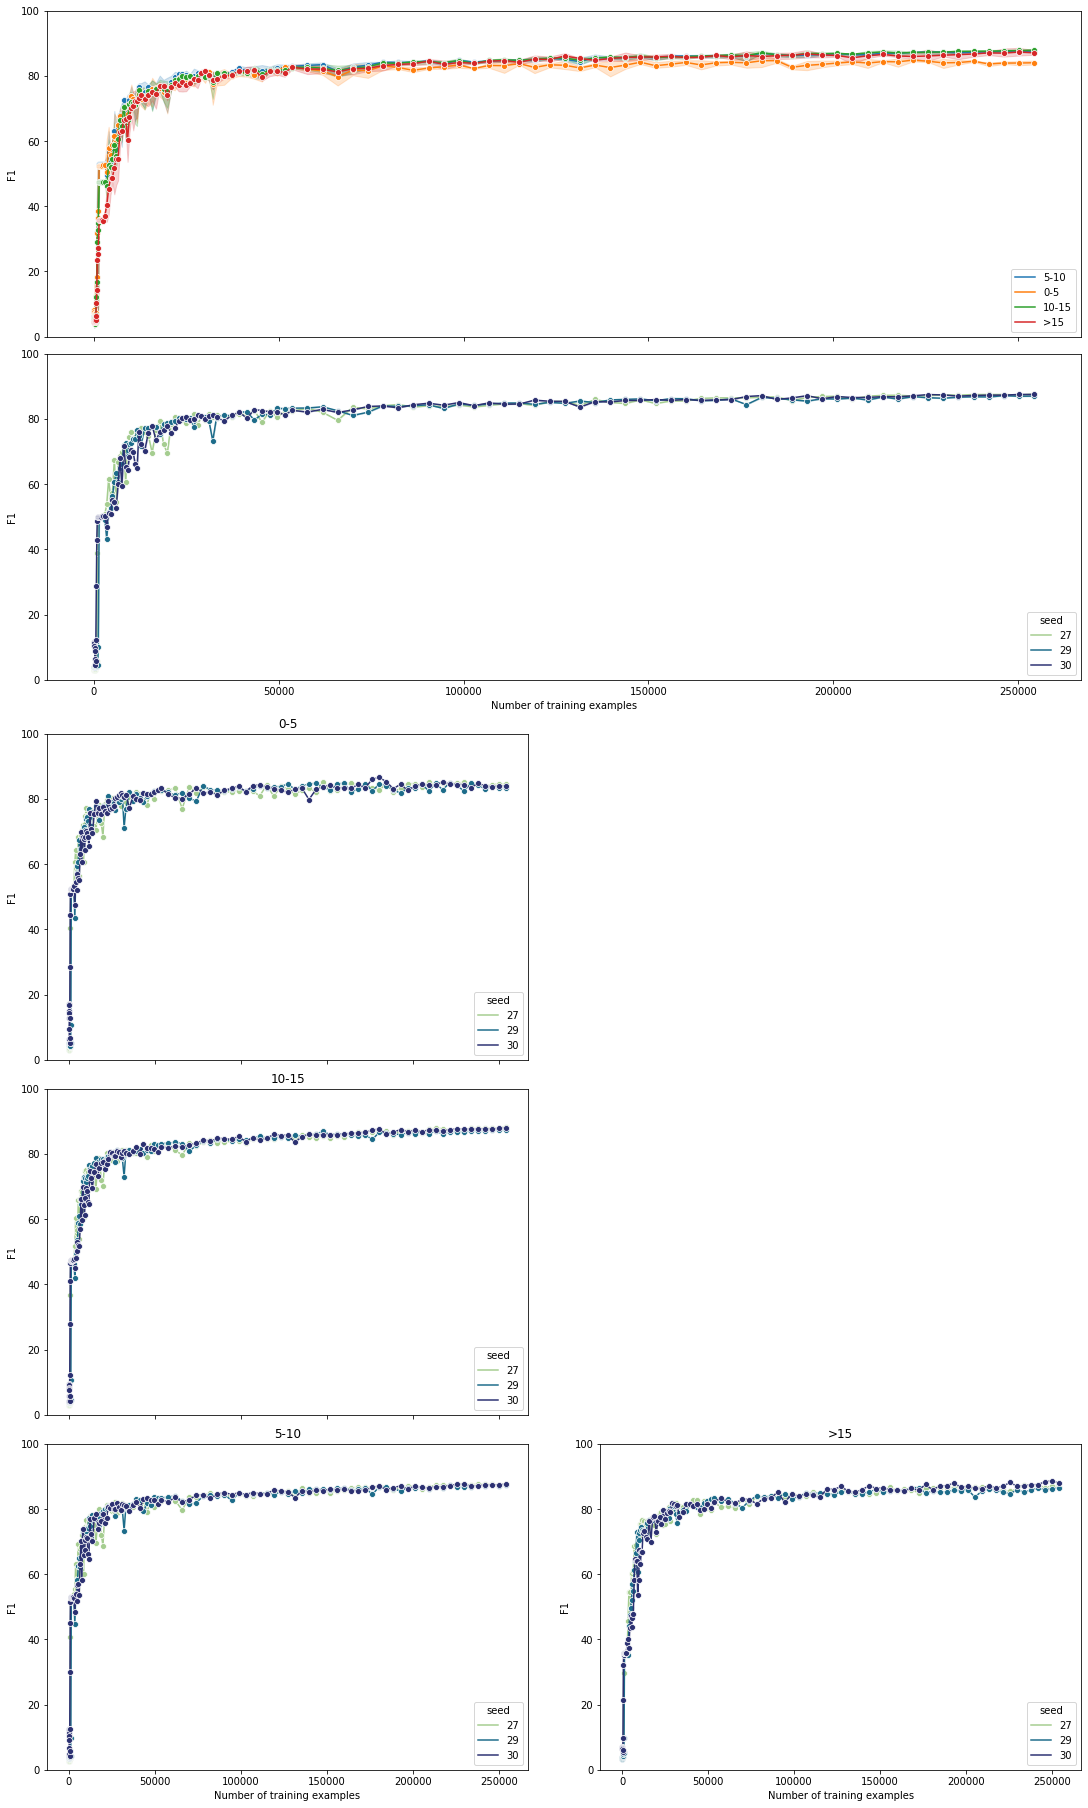

In [32]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='question_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '5-10'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('5-10')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '5-10'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-5'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-5')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '0-5'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '10-15'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('10-15')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '10-15'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>15'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>15')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '>15'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [33]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

In [34]:
metrics_by_cat_subset['question_length_bin'].unique()

array(['5-10', '0-5', '10-15', '>15'], dtype=object)

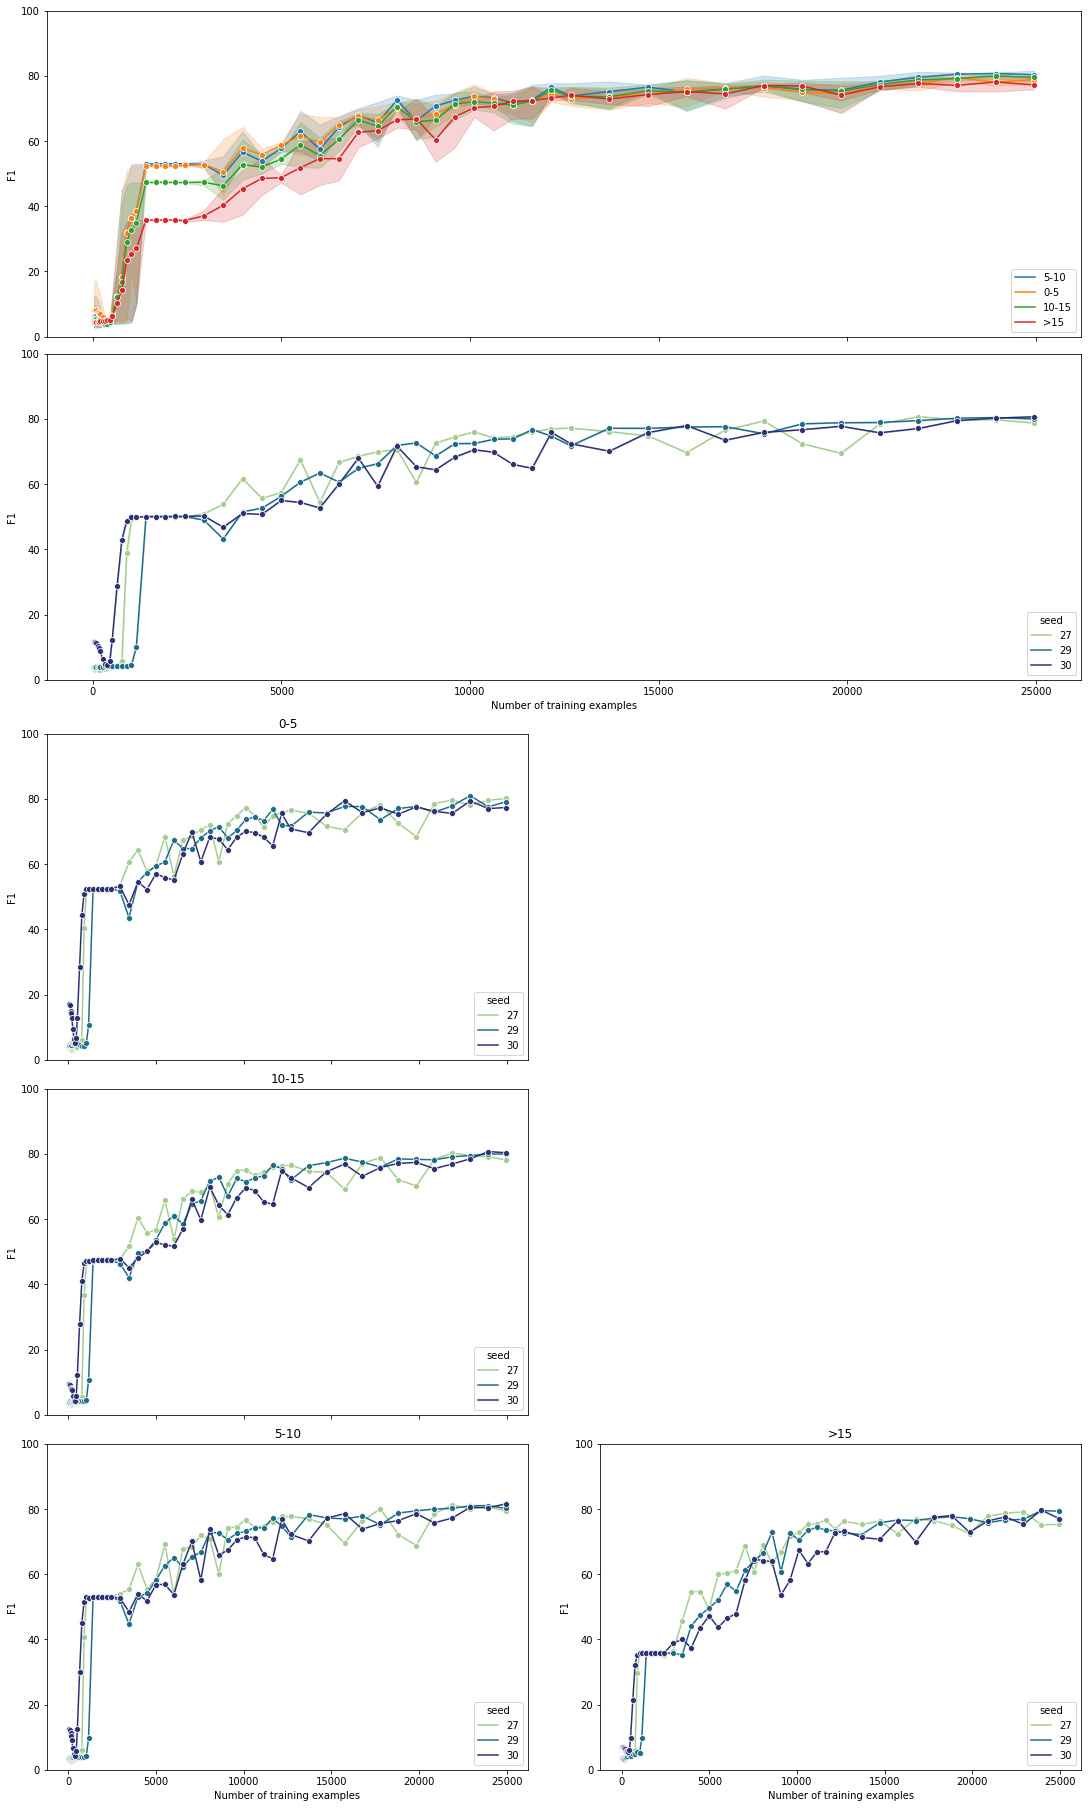

In [35]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='question_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '5-10'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('5-10')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '5-10'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-5'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-5')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '0-5'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '10-15'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('10-15')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '10-15'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>15'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>15')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '>15'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

plt.show()

## Answer type

In [36]:
metrics_by_cat = pd.DataFrame()

seeds = [27, 29, 30]
filepaths=[
    'data/processed/metrics_by_answer_type-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=27.csv',
    'data/processed/metrics_by_answer_type-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_answer_type-albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [37]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(4320, 19)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,answer_type,checkpoint,NoAns_exact,NoAns_f1,NoAns_total,overall_f1,overall_exact,seed,num_examples
0,0.000000,4.554621,376,0.0,4.554621,376.0,0.0,0.0,4.554621,0.0,Location,1,NaN,NaN,NaN,2.88437,0.075802,27,32
1,0.000000,3.316236,278,0.0,3.316236,278.0,0.0,0.0,3.316236,0.0,Date,1,NaN,NaN,NaN,2.88437,0.075802,27,32
2,0.000000,4.388650,374,0.0,4.388650,374.0,0.0,0.0,4.388650,0.0,Person,1,NaN,NaN,NaN,2.88437,0.075802,27,32
3,0.000000,2.875137,804,0.0,2.875137,804.0,0.0,0.0,2.875137,0.0,Other Numeric,1,NaN,NaN,NaN,2.88437,0.075802,27,32
4,0.084104,0.084104,5945,NaN,NaN,NaN,100.0,0.0,100.000000,0.0,UNANS,1,0.084104,0.084104,5945.0,2.88437,0.075802,27,32


In [38]:
metrics_by_cat['answer_type'].unique()

array(['Location', 'Date', 'Person', 'Other Numeric', 'UNANS',
       'Other Entity', 'Organisation', 'Other', 'Clause',
       'Common Noun Phrase', 'Adjective Phrase', 'Verb Phrase'],
      dtype=object)

Drop `UNANS`

In [39]:
metrics_by_cat = metrics_by_cat[metrics_by_cat['answer_type'] != 'UNANS']

### Full checkpoints

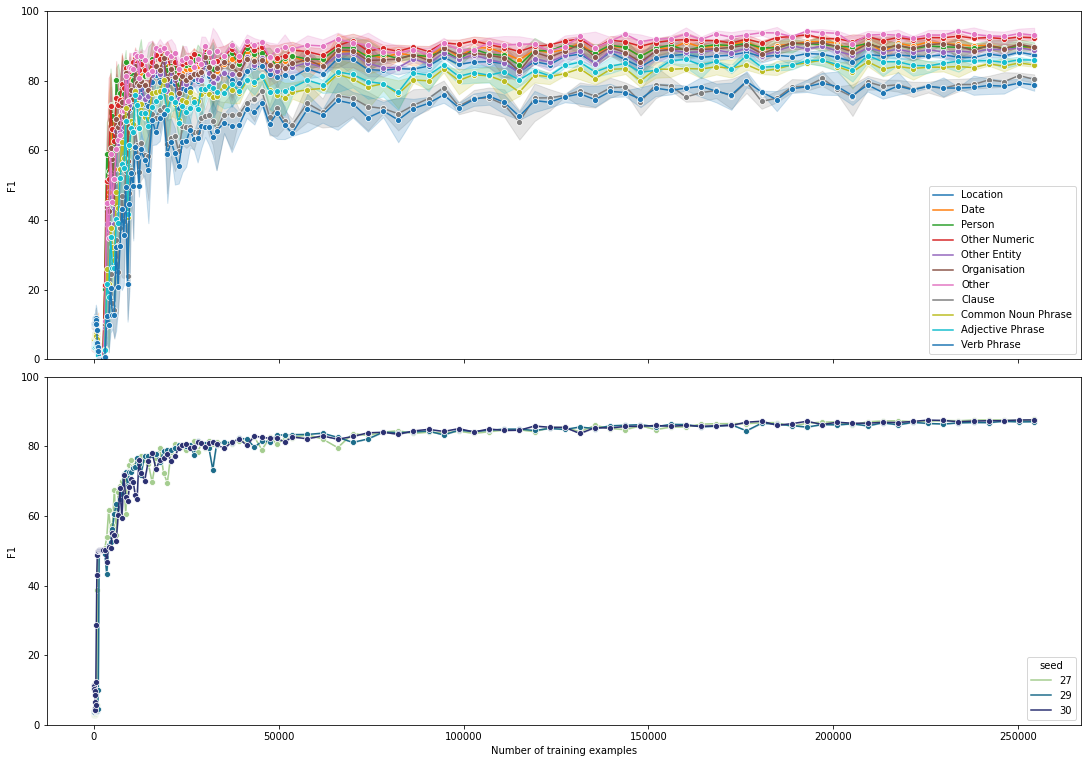

In [40]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='answer_type', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()

### Initial checkpoints

In [41]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

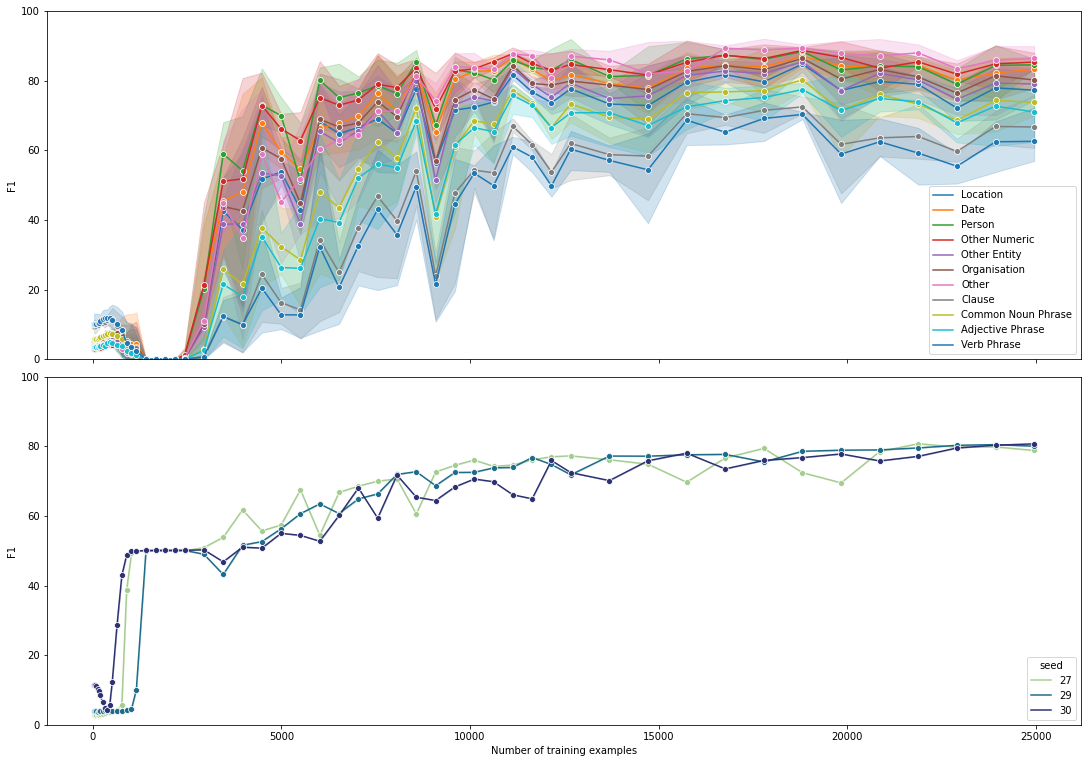

In [42]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='answer_type', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()